# SCOTCH testing notebook, Martine

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd

In [57]:
# Load up the SCOTCH catalog
cattype = 'ZLIM'
scotch = h5py.File("/global/cscratch1/sd/mlokken/sn_hostenv/scotch_{:s}_V2.hdf5".format(cattype), "r")
htable = scotch['HostTable']
ttable = scotch['TransientTable']

### 1) Check that host-transient position offsets depend on galaxy radius
We should find a loose correlation due to the selection of position based on Sersic profiles


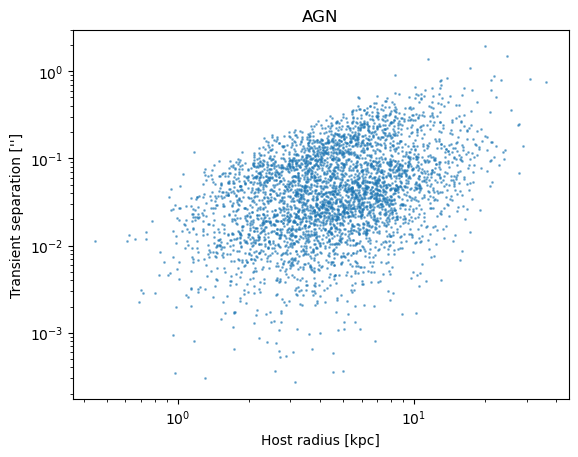

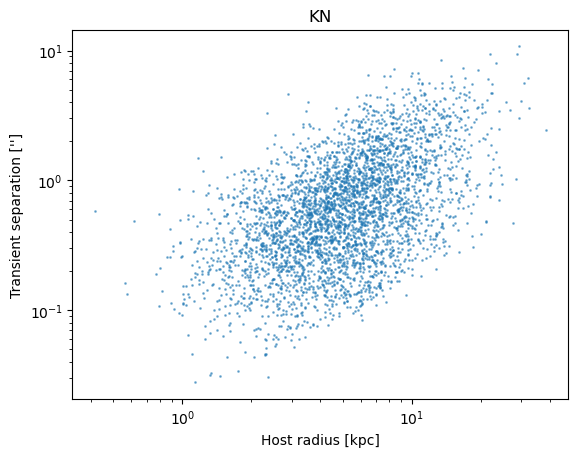

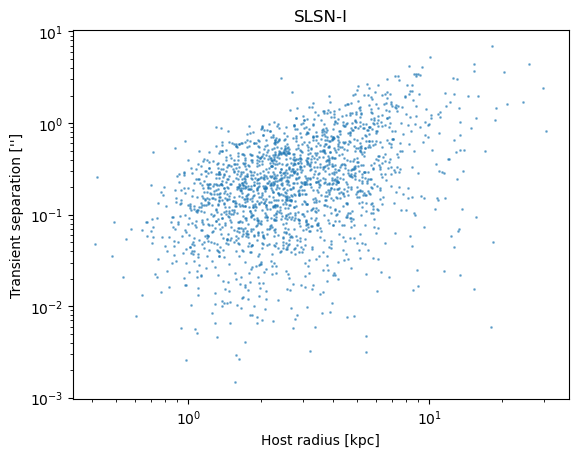

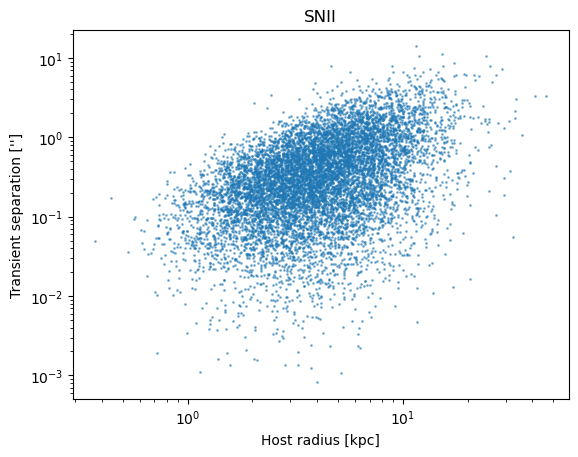

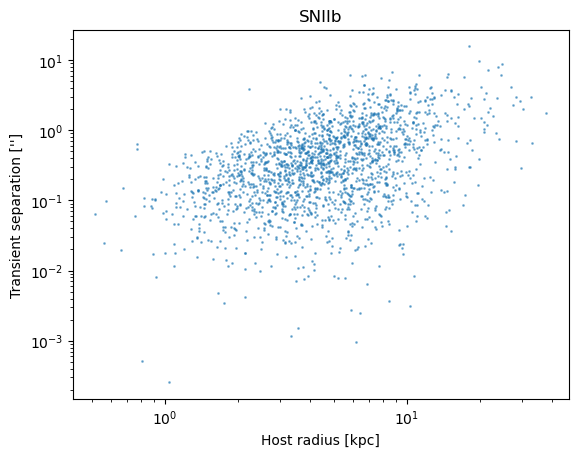

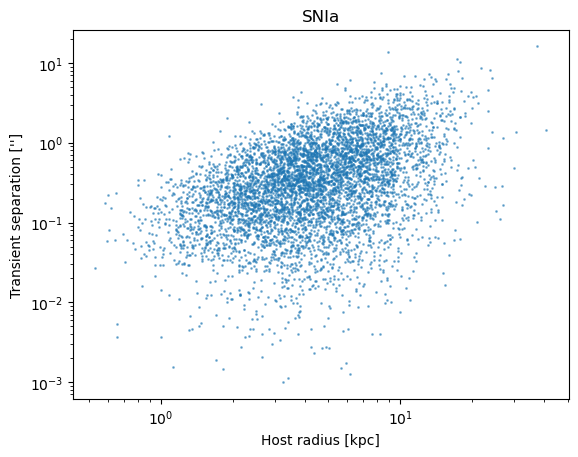

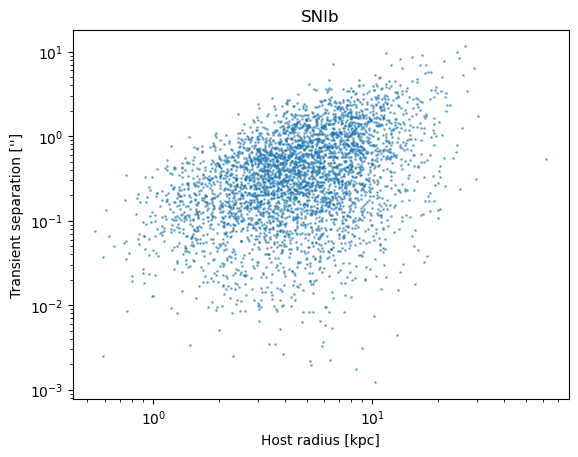

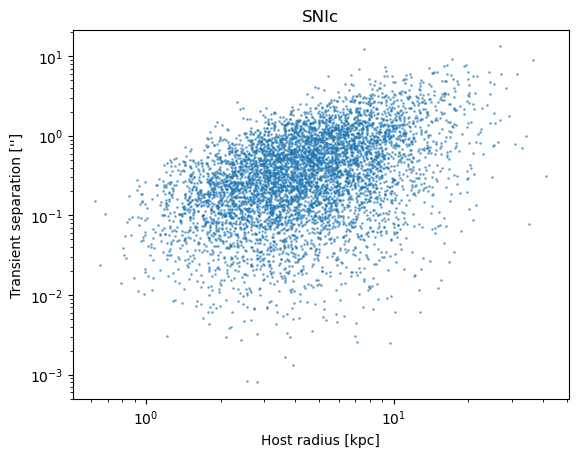

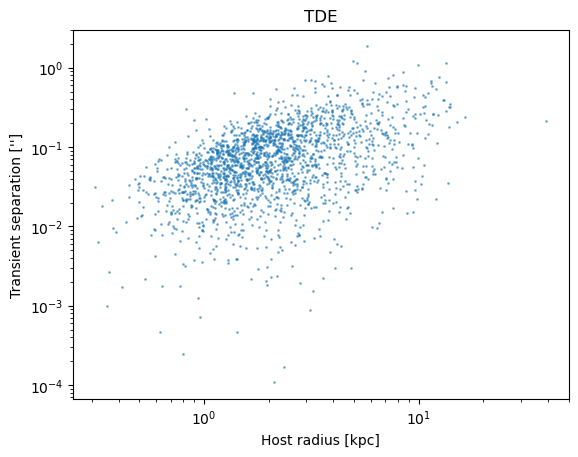

<Figure size 640x480 with 0 Axes>

In [58]:
N=2000
for cl in htable.keys():
    tids = []
    sep  = []
    for mod in ttable[cl].keys():
        tids.extend(ttable[cl][mod]['TID'][:N]) # take first 200 TIDs
        sep.extend(ttable[cl][mod]['sep'][:N])
    df1 = pd.DataFrame(data={'sep':sep, 'TID':tids})
    df2 = pd.DataFrame(data={'R_d':htable[cl]['R_d'][:], 'R_s':htable[cl]['R_s'], 'TID':htable[cl]['TID']})
    merged = df1.merge(df2, how='inner',on='TID')
    plt.scatter(np.sqrt(merged['R_d']**2+merged['R_s']**2),merged['sep'], s=1, alpha=.5)
    plt.yscale('log')
    plt.xscale('log')
    plt.title(cl)
    plt.xlabel("Host radius [kpc]")
    plt.ylabel("Transient separation ['']")
    plt.show()
    plt.clf()
    

### 2) Check distribution of every host property and see that it makes sense
Make sure the units and average values seem OK for a few classes


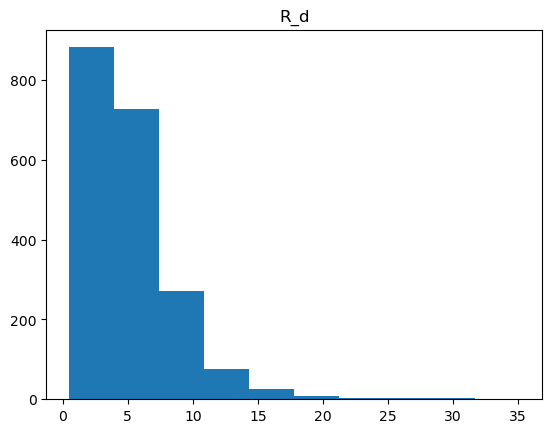

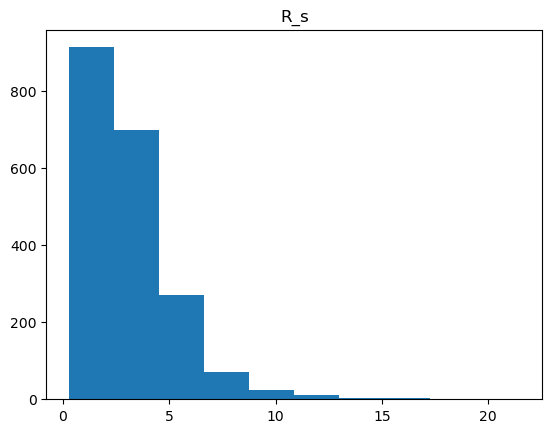

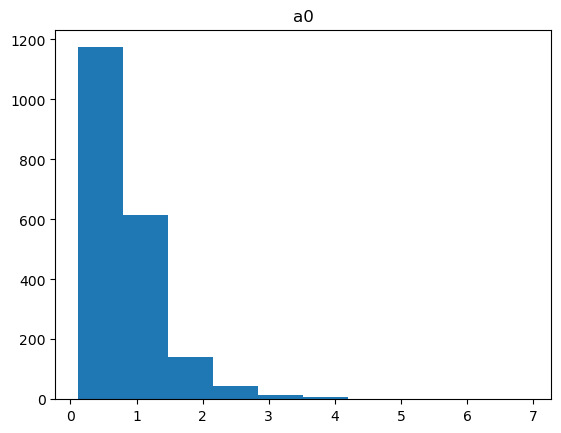

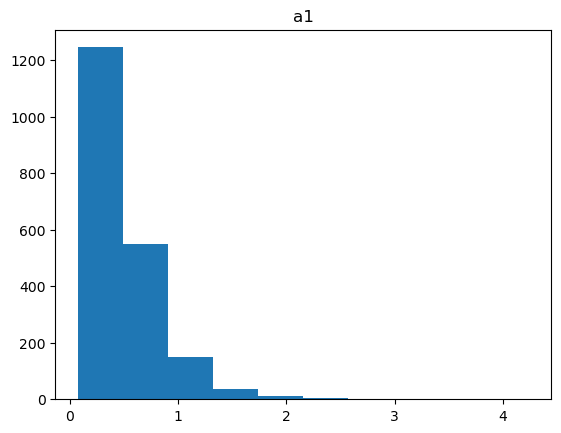

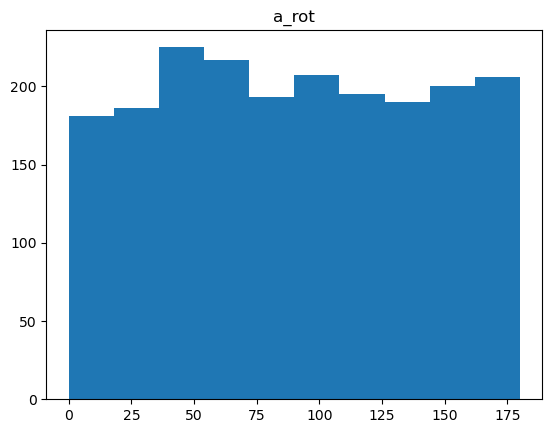

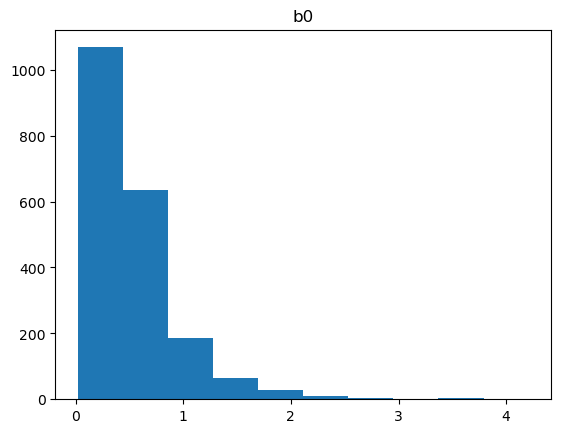

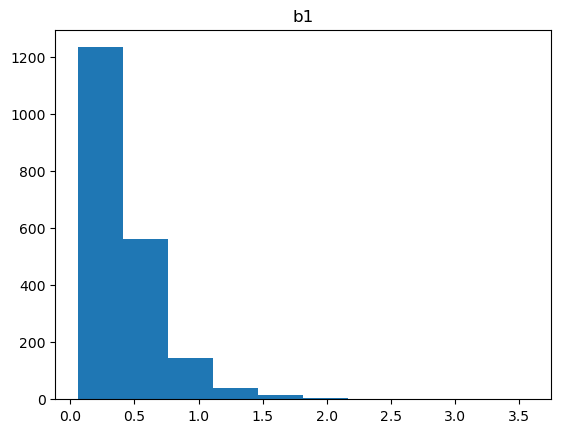

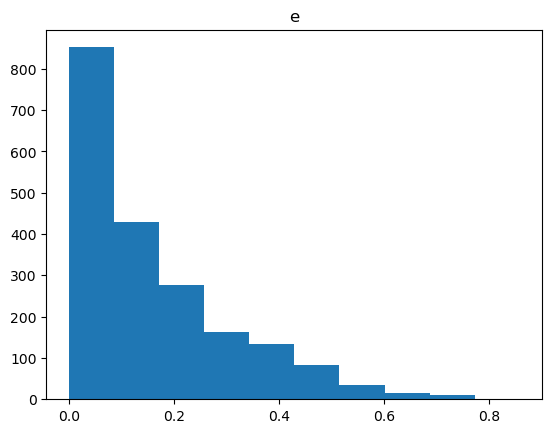

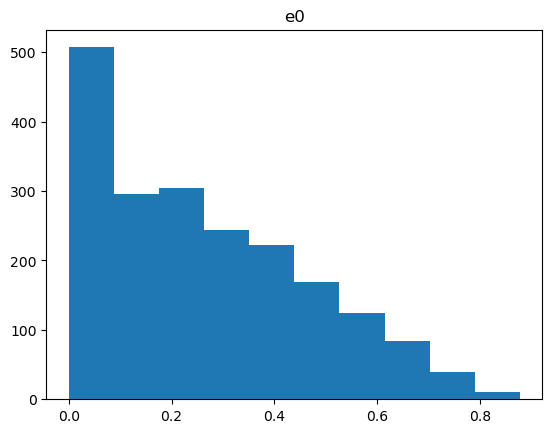

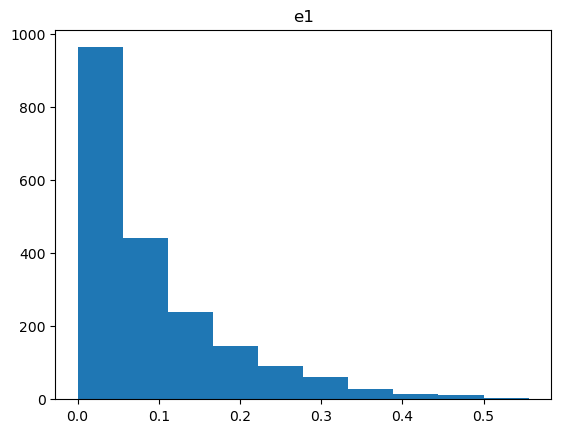

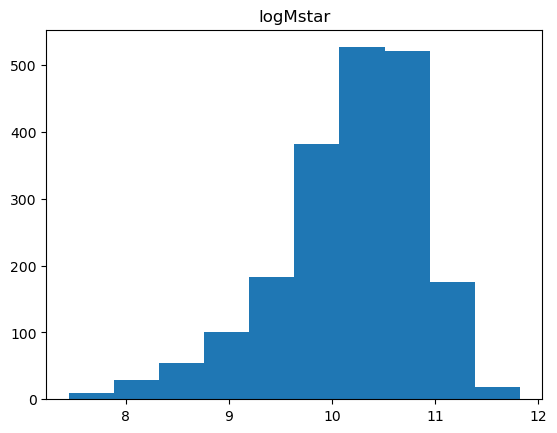

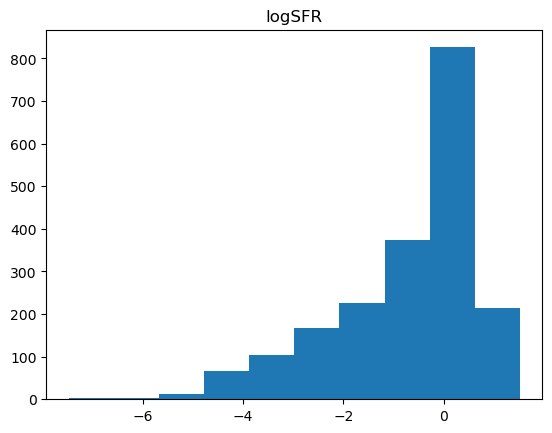

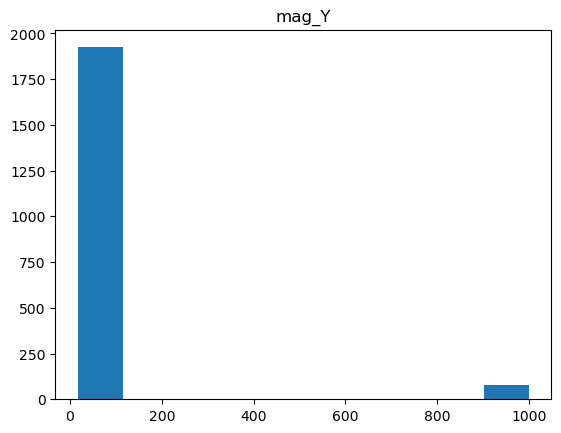

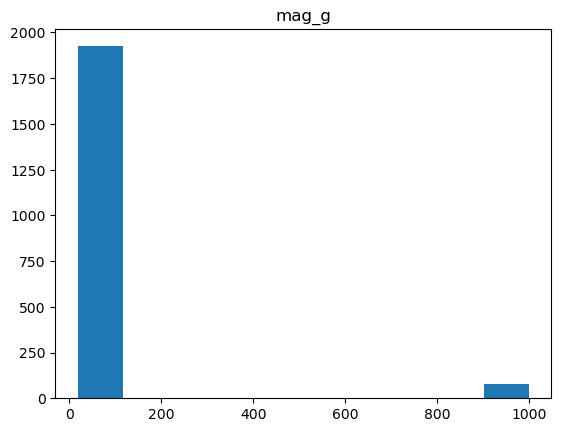

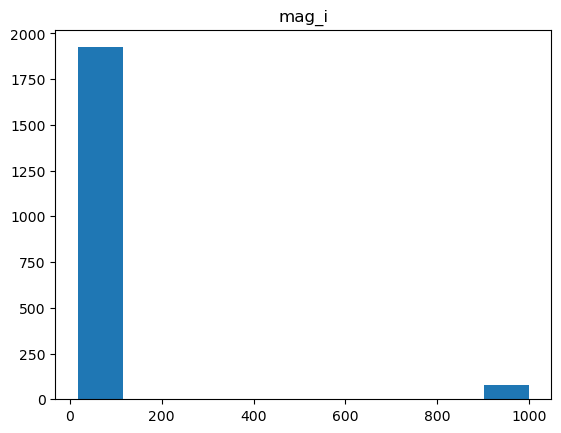

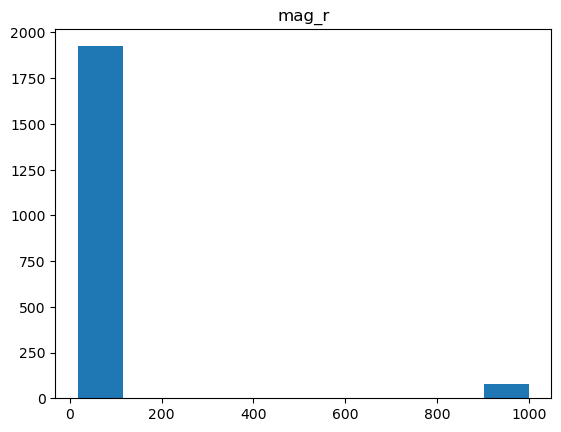

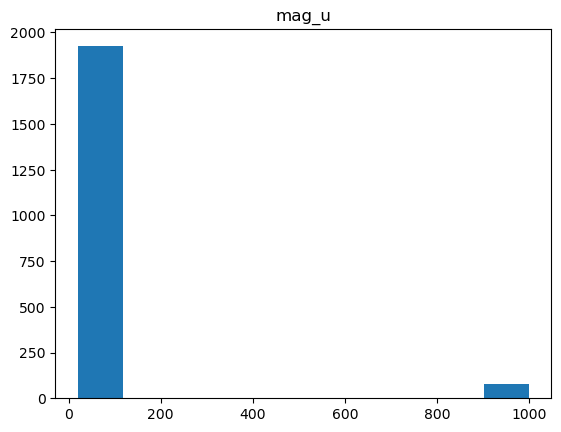

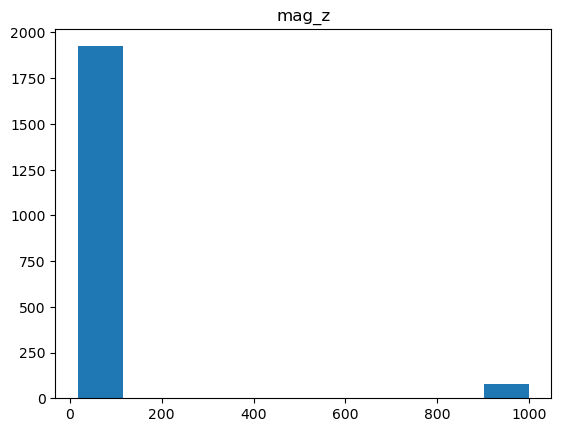

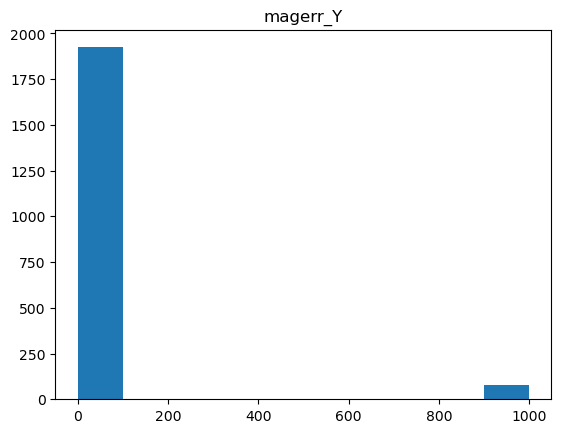

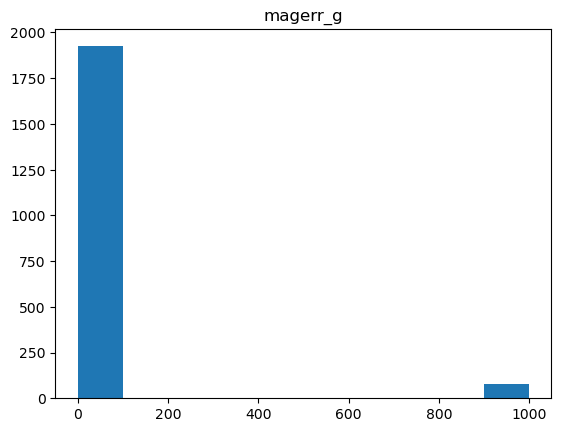

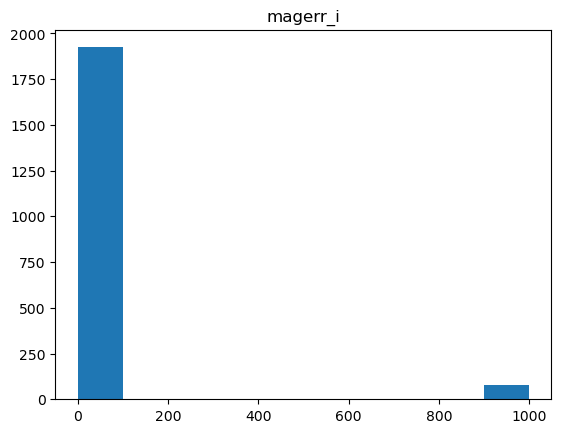

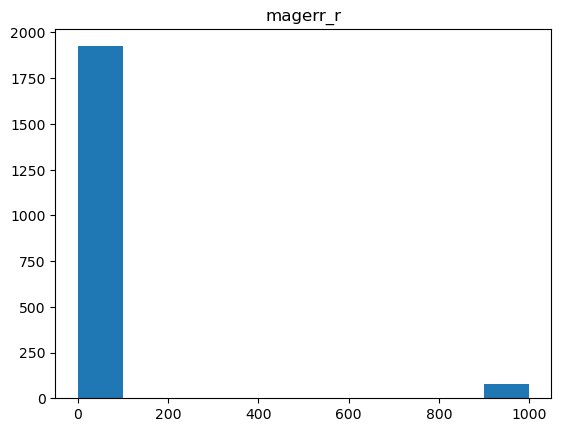

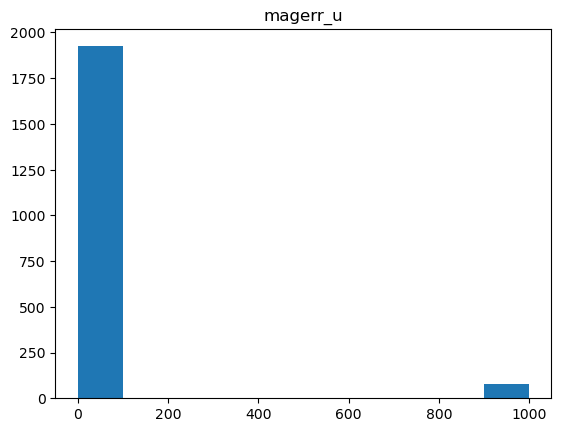

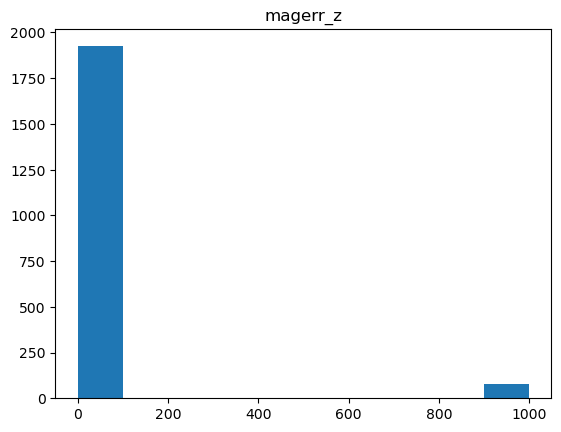

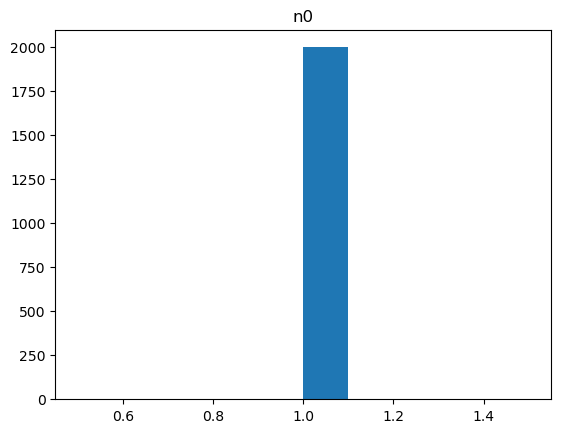

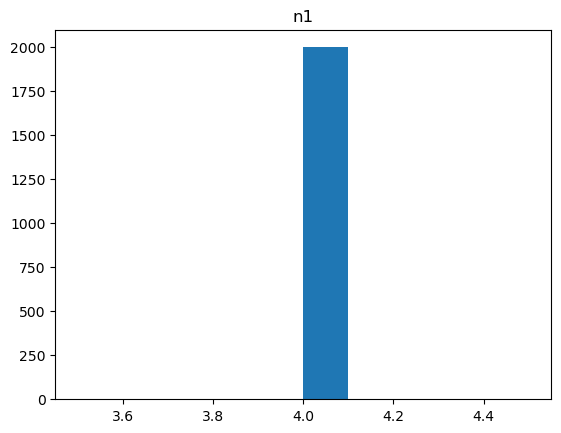

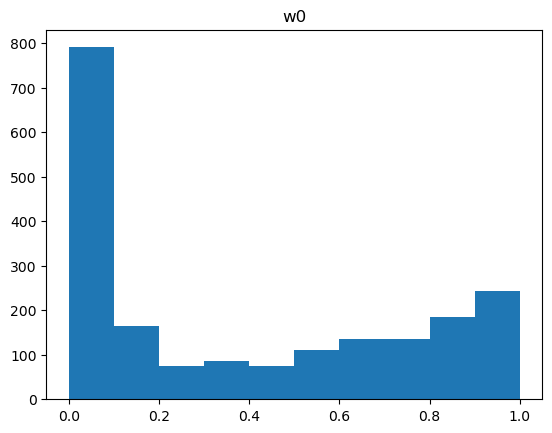

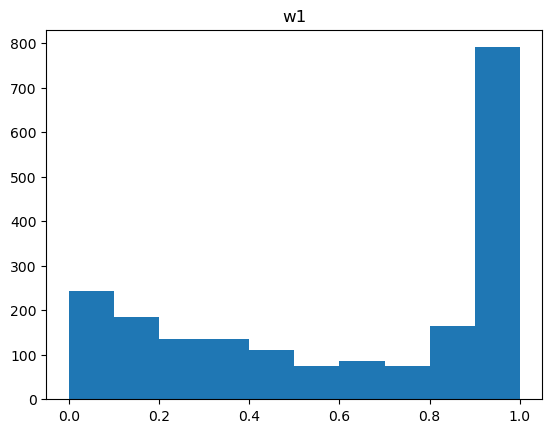

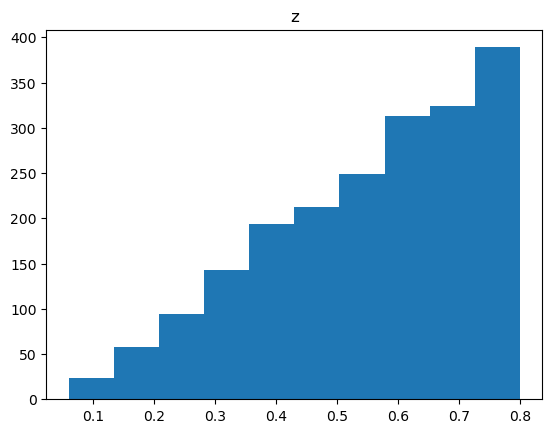

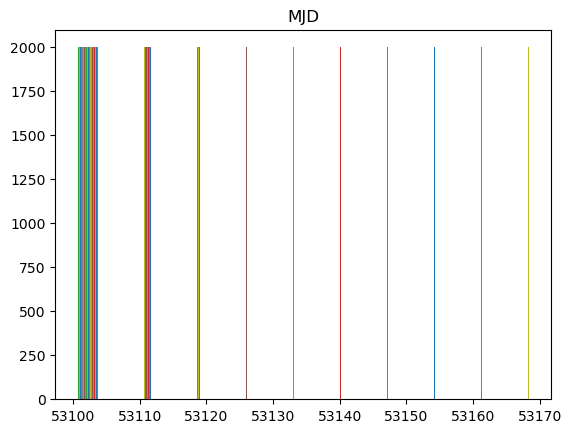

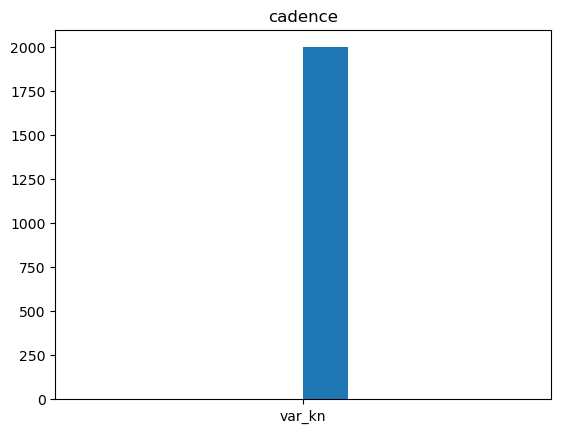

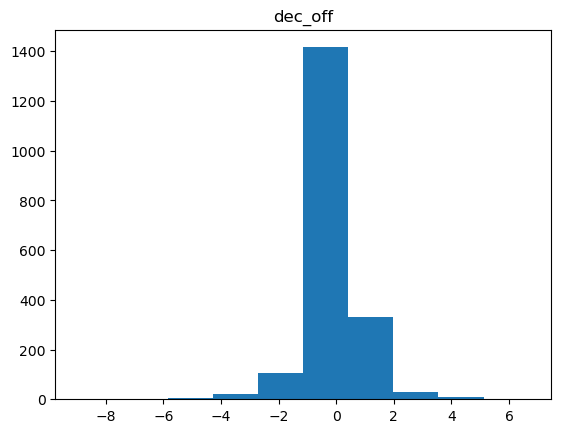

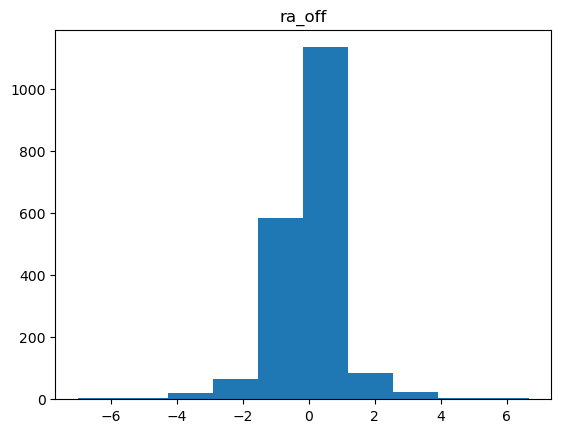

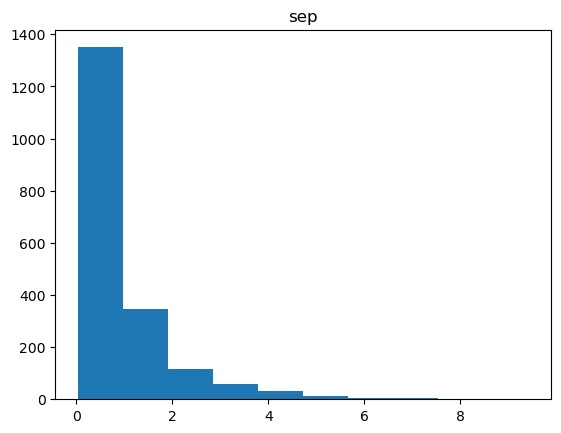

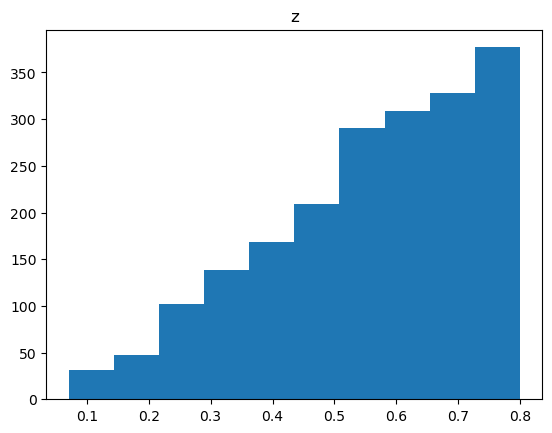

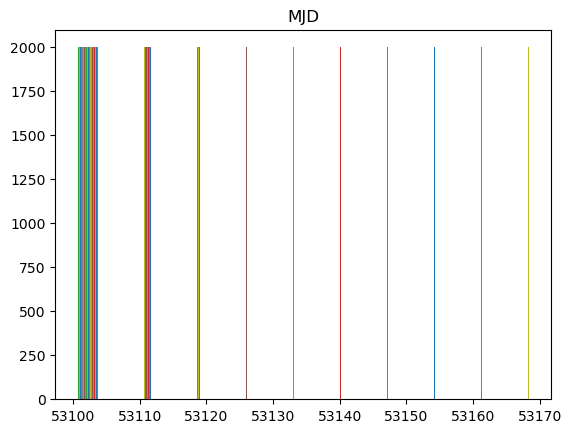

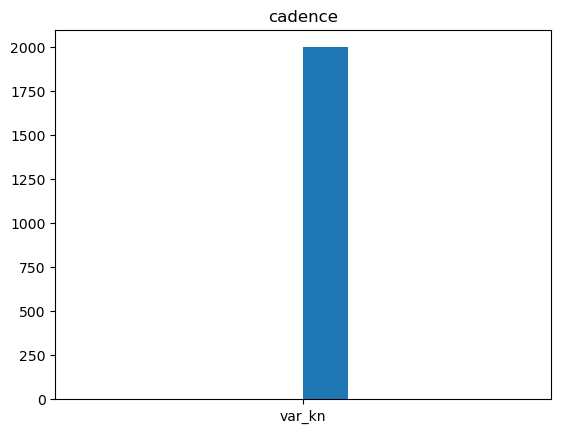

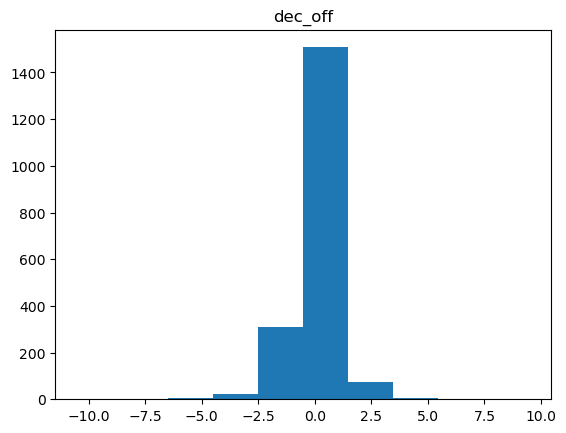

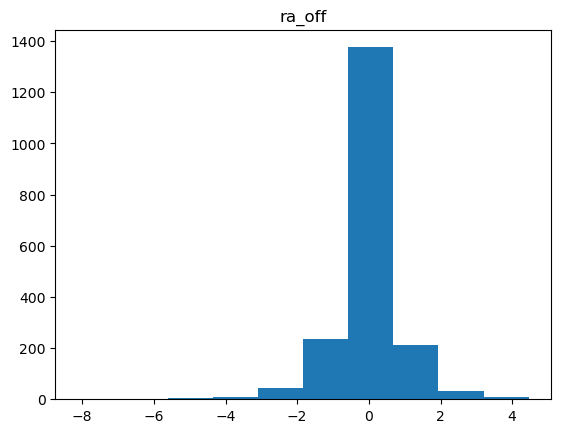

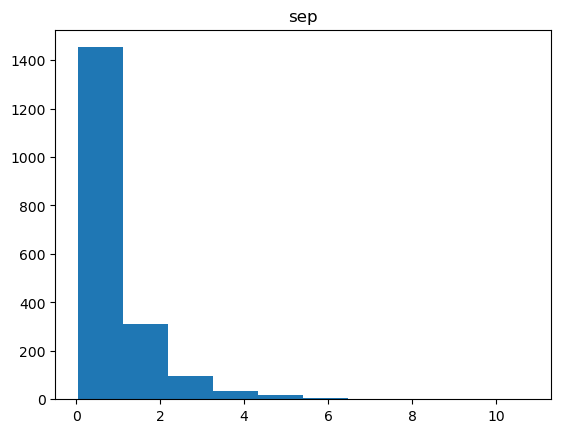

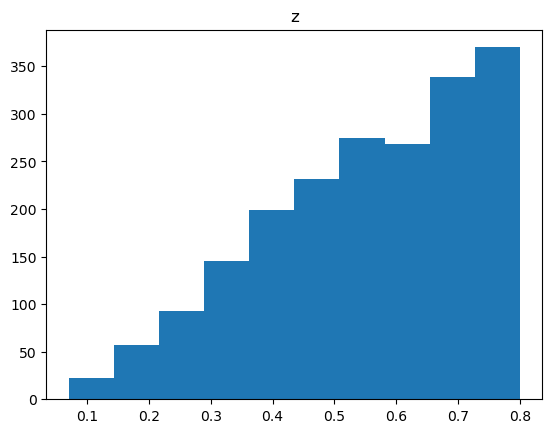

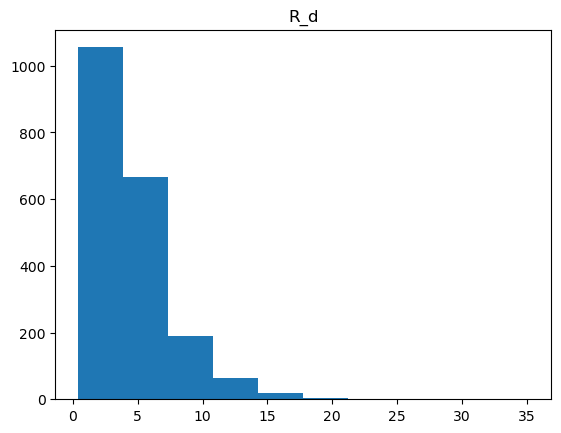

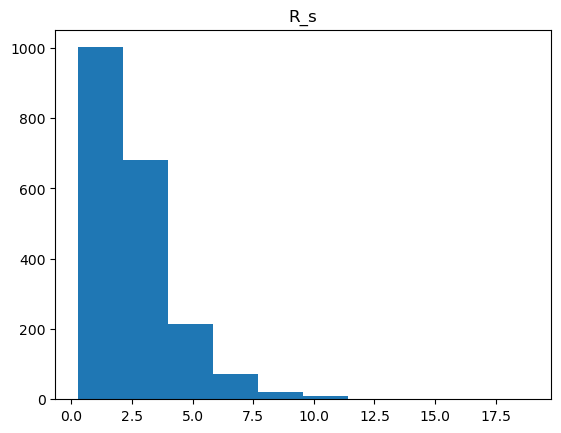

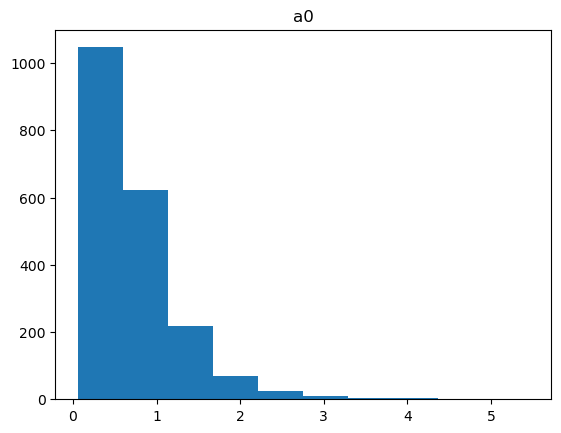

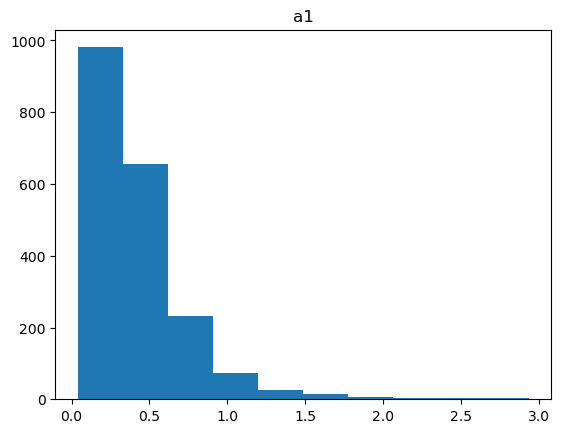

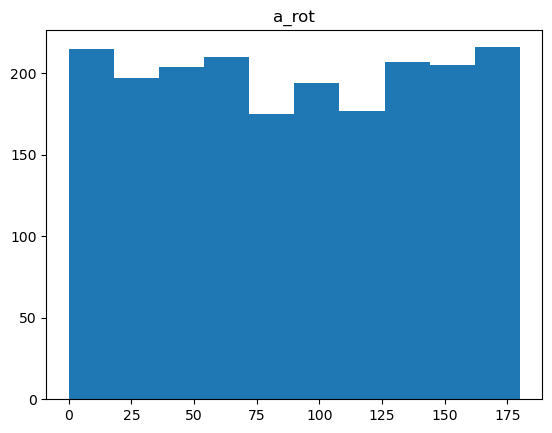

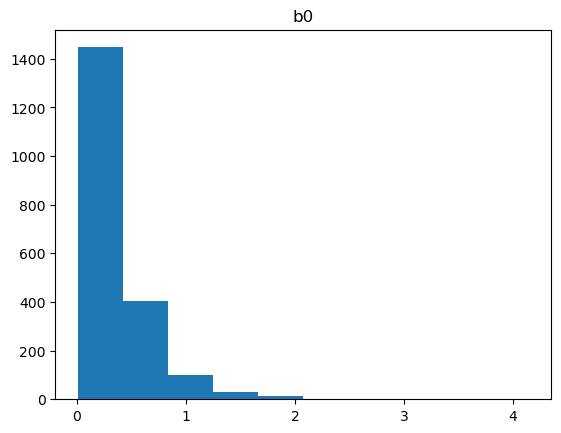

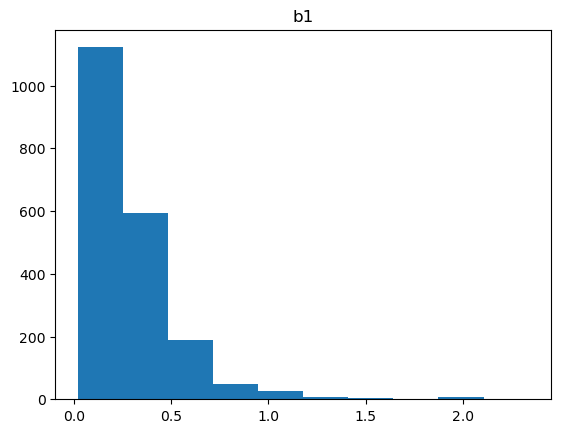

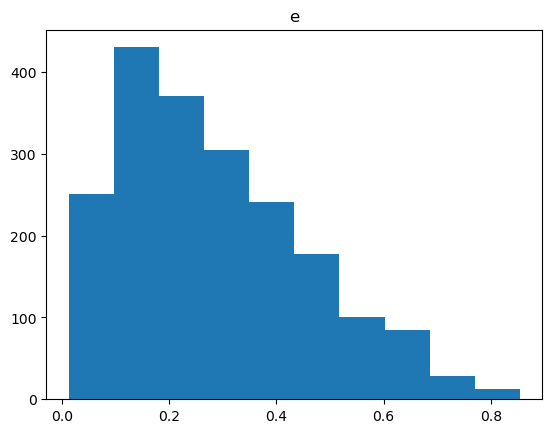

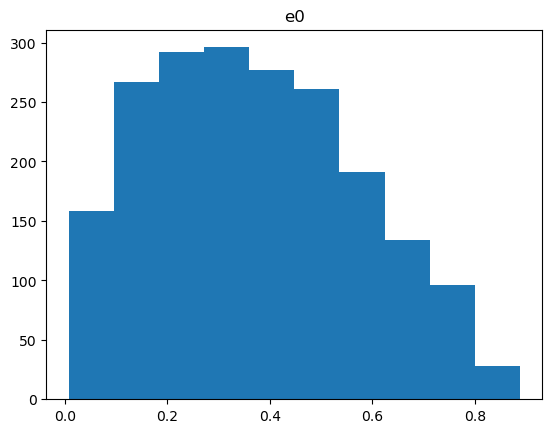

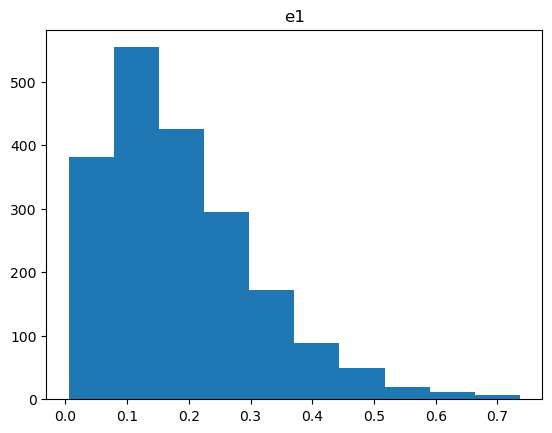

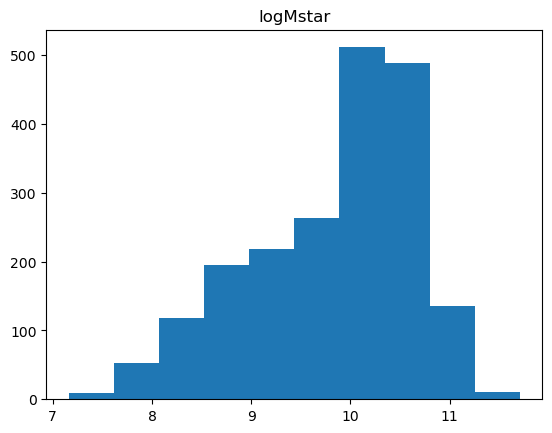

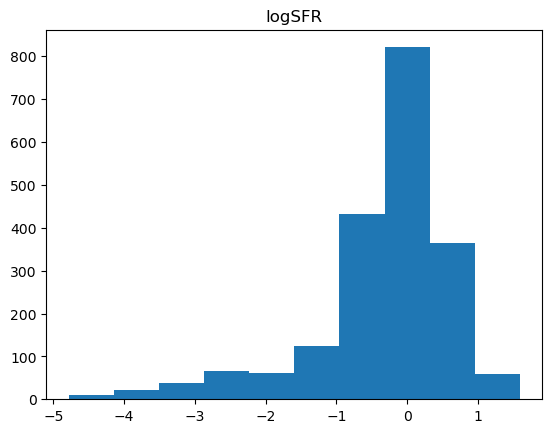

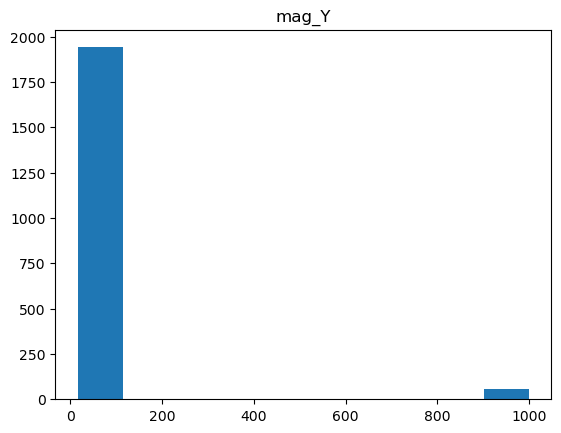

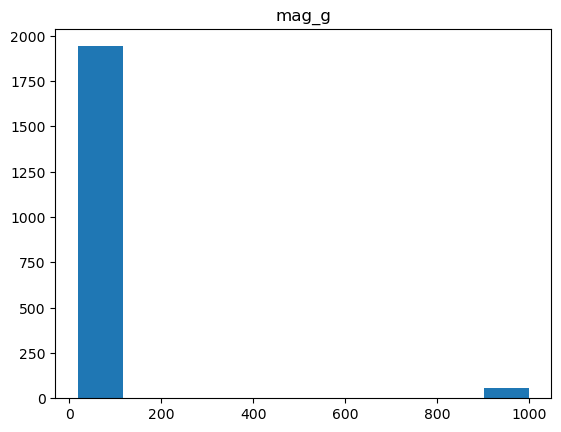

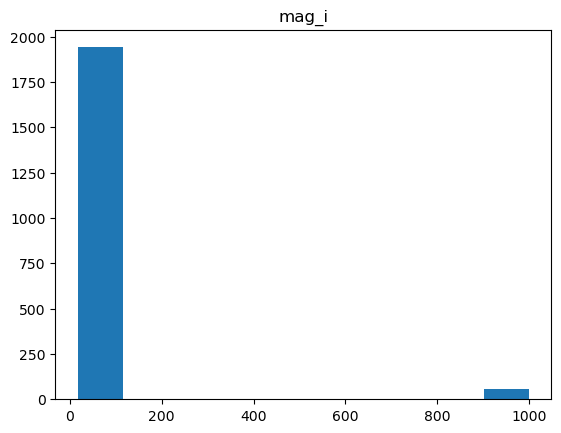

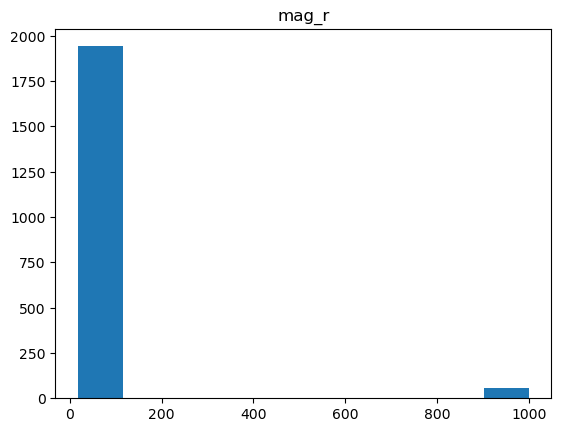

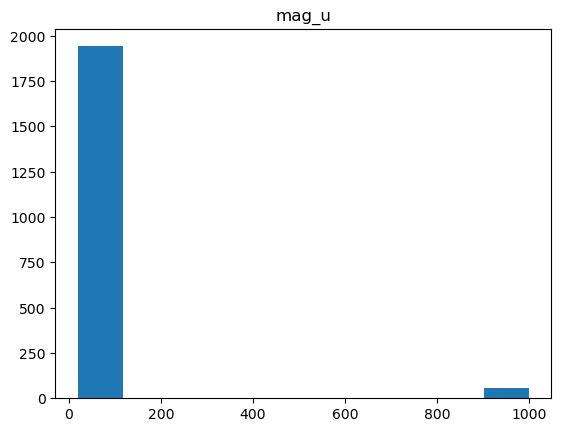

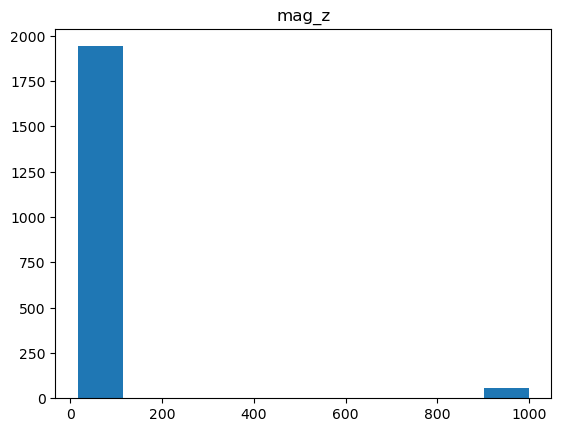

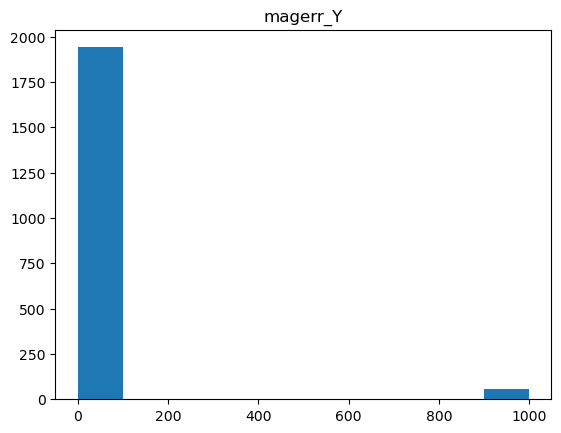

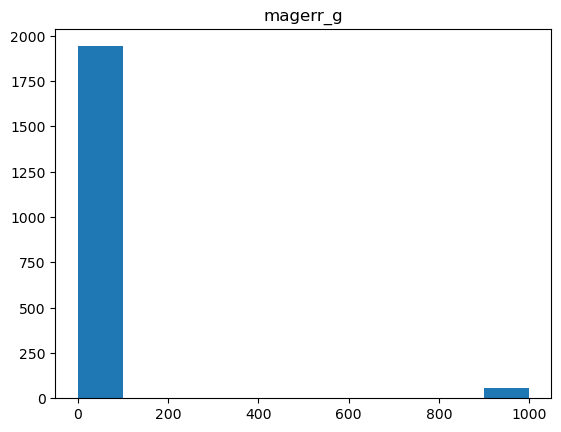

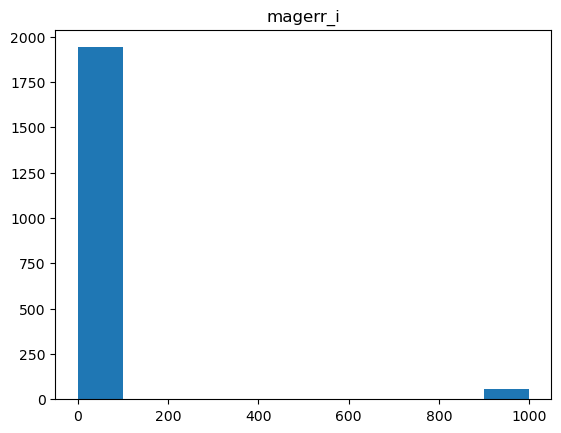

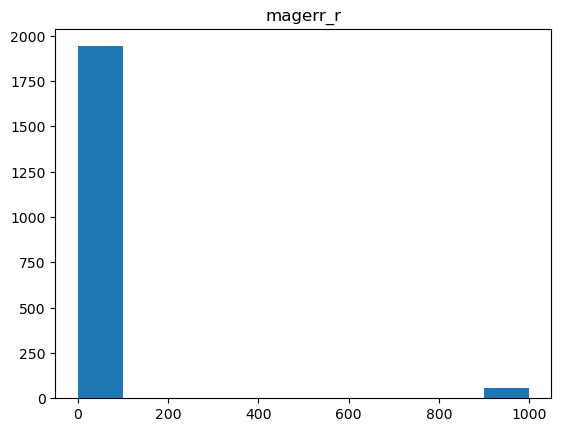

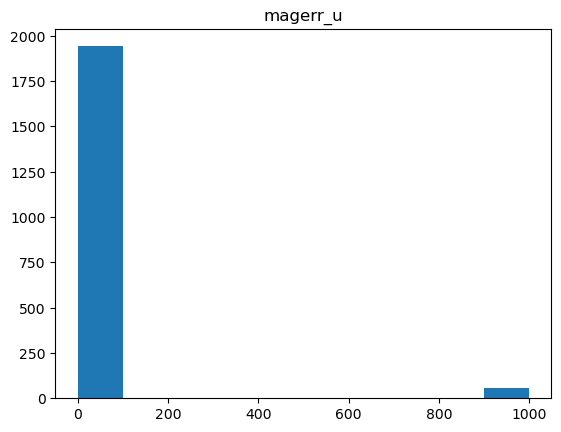

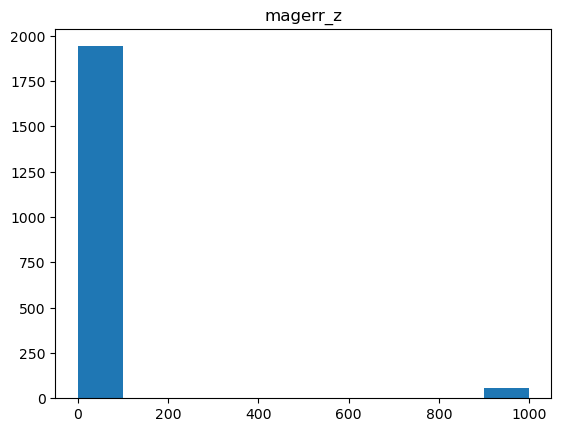

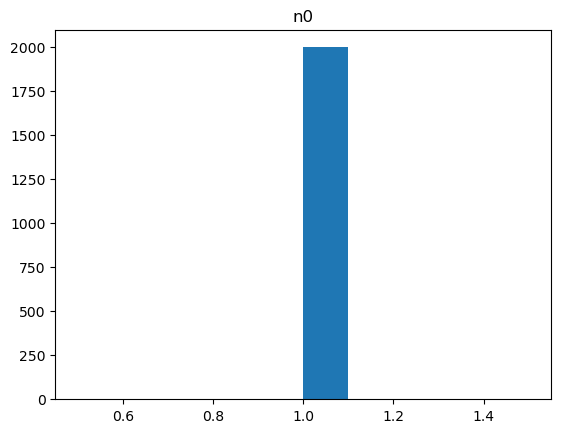

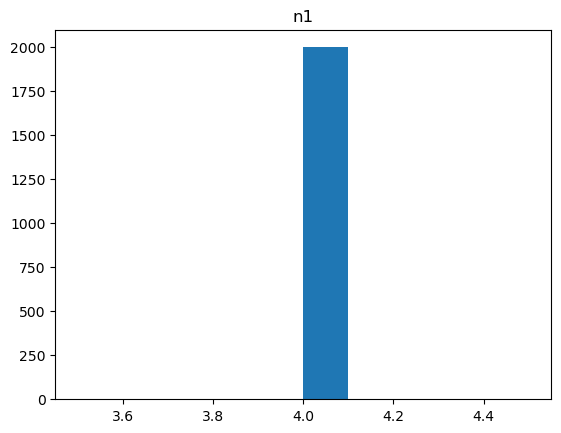

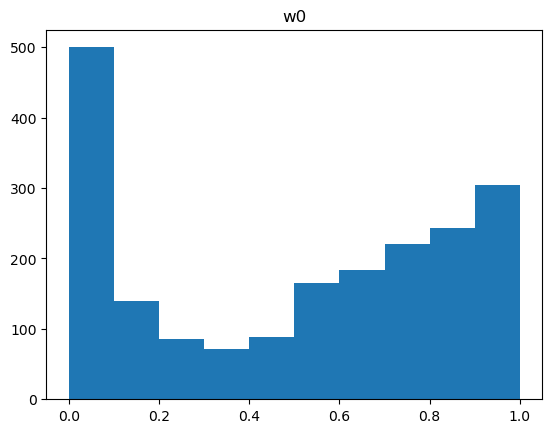

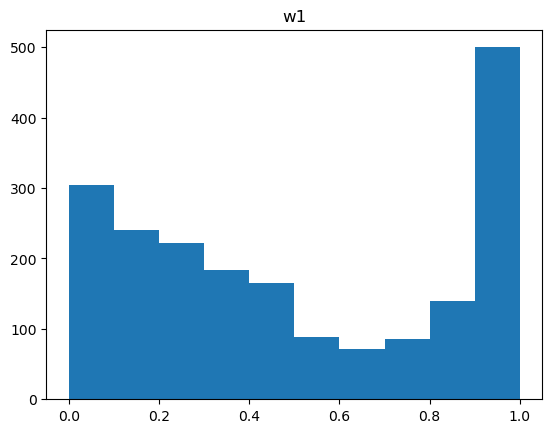

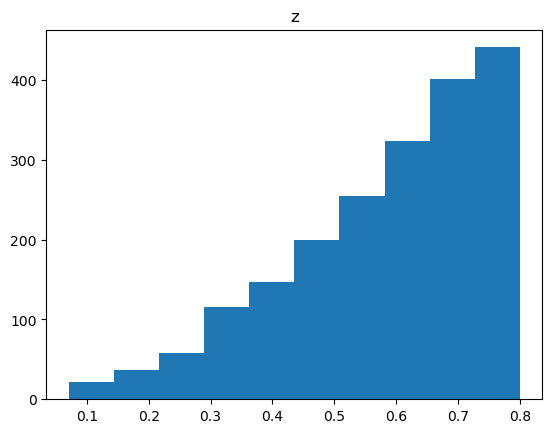

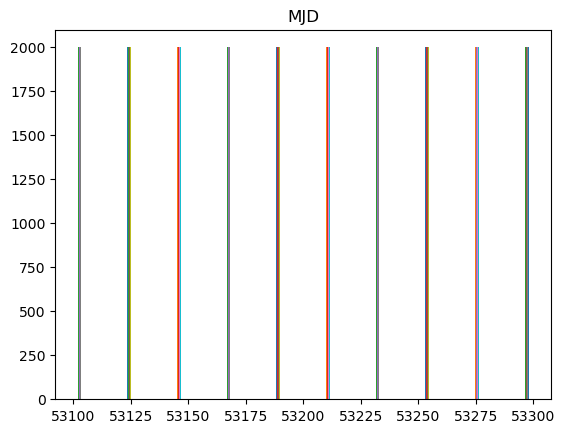

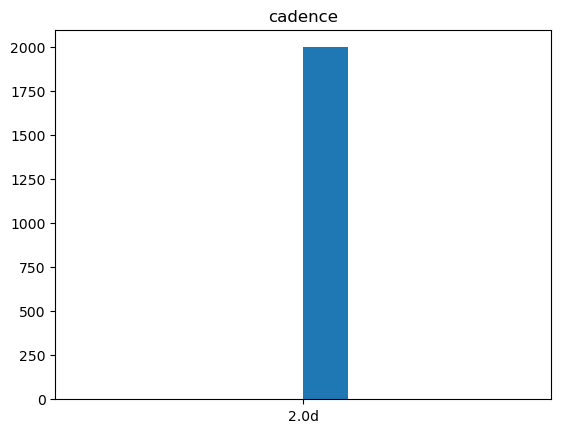

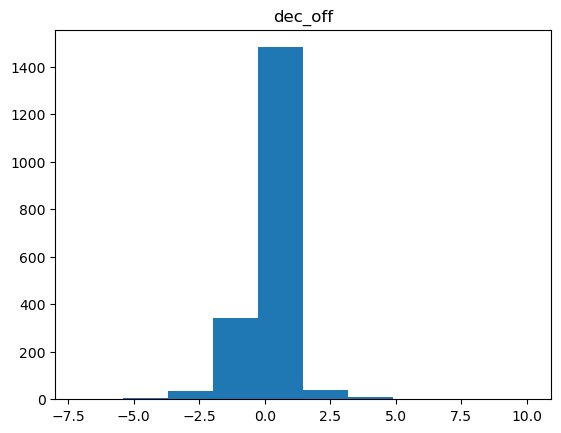

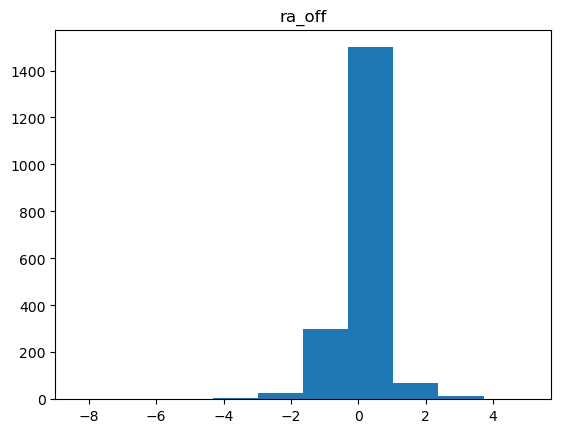

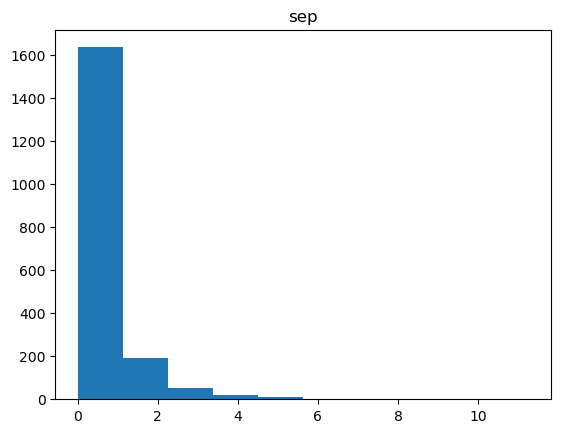

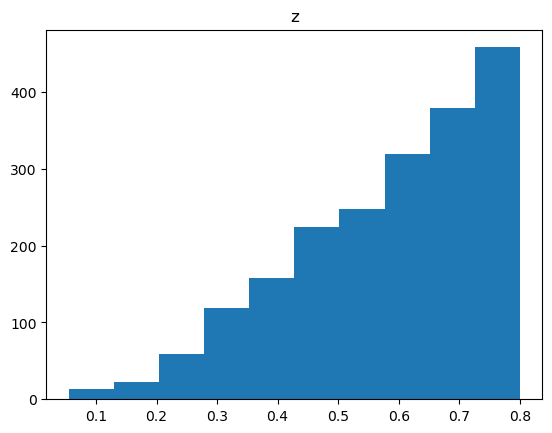

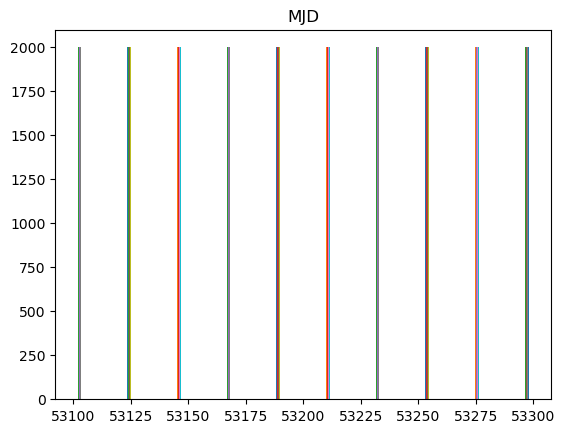

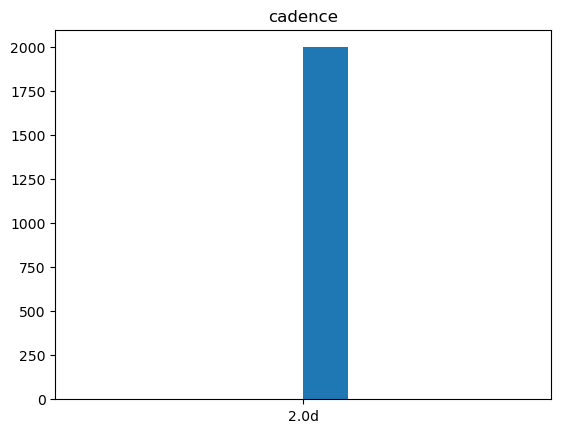

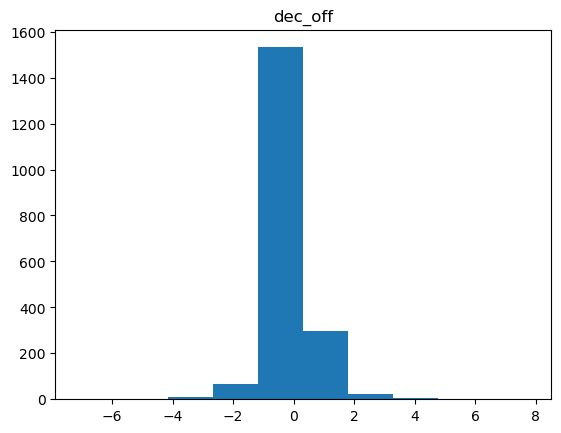

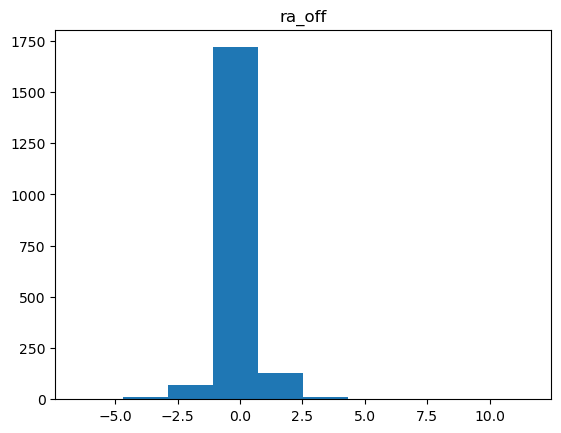

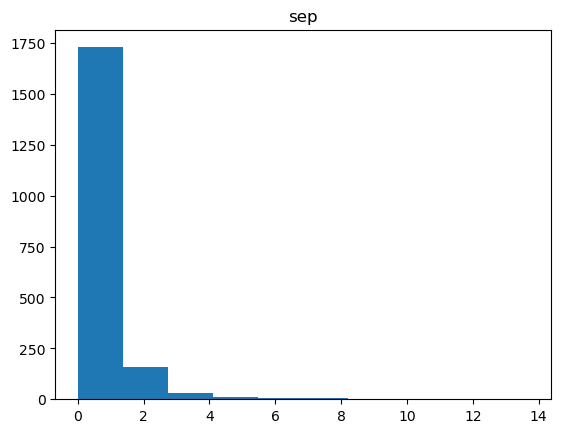

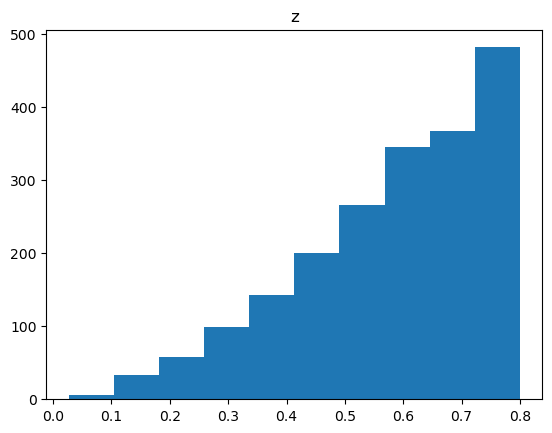

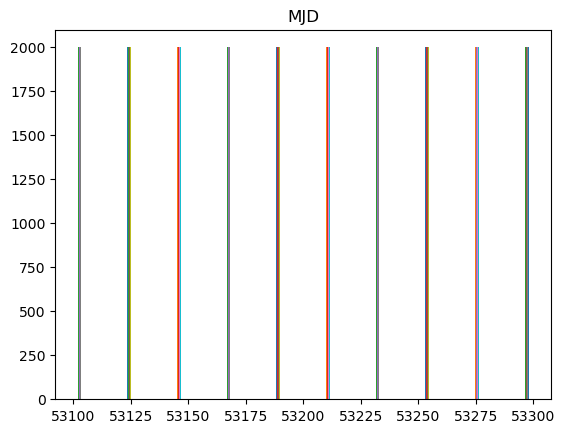

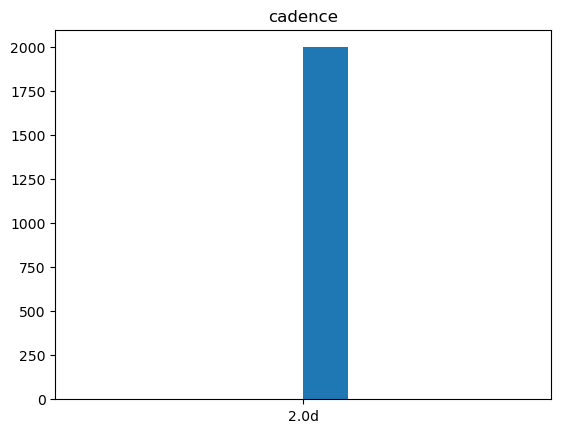

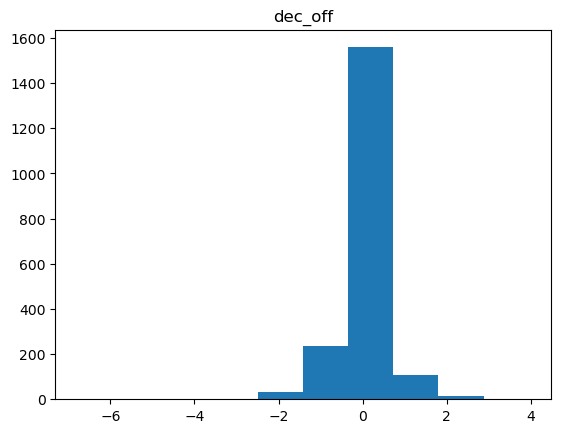

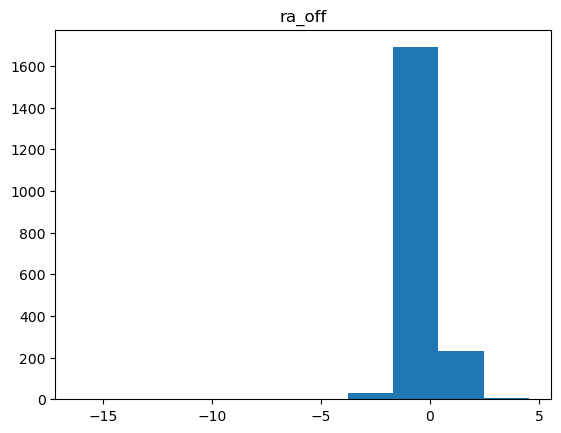

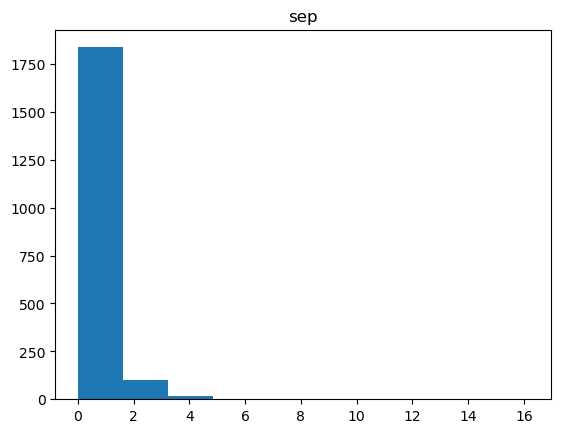

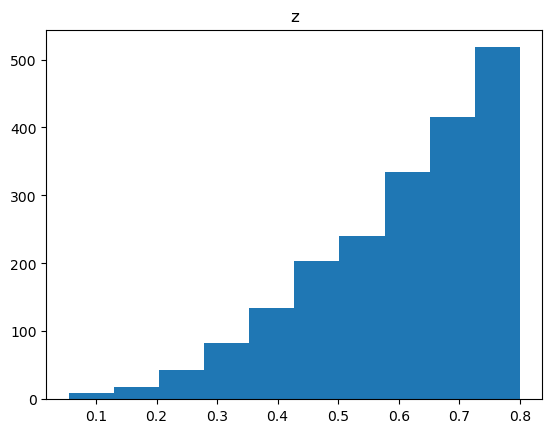

<Figure size 640x480 with 0 Axes>

In [59]:
N=2000
for cl in ['KN', 'SNIa']:
    for prop in htable[cl].keys():
        if prop not in ['GID', 'TID', 'dc2ID']:
            plt.hist(htable[cl][prop][:N])
            plt.title(prop)
            plt.show()
            plt.clf()
    for mod in ttable[cl].keys():
        for prop in ttable[cl][mod].keys():
            if prop not in ['GID', 'TID', 'dc2ID'] and 'mag' not in prop:
                plt.hist(ttable[cl][mod][prop][:N])
                plt.title(prop)
                plt.show()
                plt.clf()


### 3) Check that every galaxy has a CosmoDC2 match, and that the SFR and M properties match 


<bound method NDFrame.head of           dc2ID  logSFR  logMstar  stellar_mass  totalStarFormationRate  \
0    6001190472 -0.4547    8.4018  2.522537e+08            3.509679e+08   
1   10562864631 -0.6248    9.3525  2.251463e+09            2.372309e+08   
2   10562525577 -0.9377    9.0521  1.127448e+09            1.154332e+08   
3   10376328567  0.5688   10.2580  1.811527e+10            3.704750e+09   
4   10376331974 -1.9680    8.9772  9.488597e+08            1.076529e+07   
..          ...     ...       ...           ...                     ...   
95   9750192632 -1.4477    7.8191  6.593800e+07            3.567213e+07   
96  10313133159  0.3769   10.7845  6.088842e+10            2.381876e+09   
97   5937929021 -0.4045    8.1726  1.488067e+08            3.940453e+08   
98   7938141184 -1.4978    7.8088  6.438864e+07            3.178127e+07   
99   9687876066 -1.1401    8.0388  1.093399e+08            7.242978e+07   

      galaxy_id  
0    6001190472  
1   10562864631  
2   10562525577

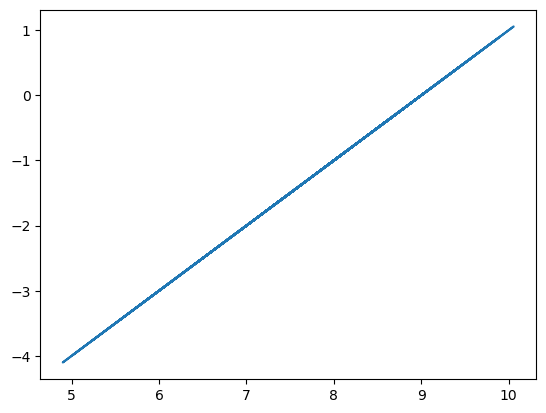

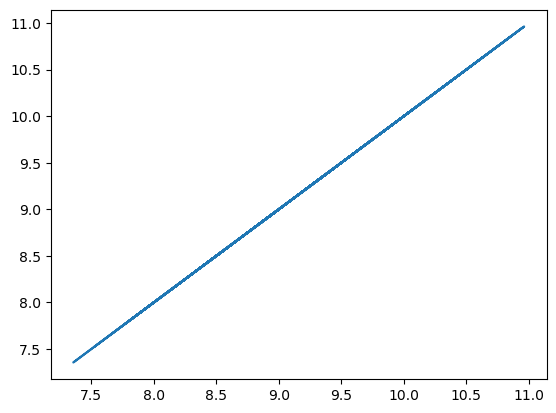

In [60]:
N=100
cosmo = GCRCatalogs.load_catalog("cosmoDC2_v1.1.4_image")
for cl in htable.keys():
    if cl=='SLSN-I': # test something random
        clas = htable[cl]
        dc2id = pd.DataFrame({'dc2ID':np.array(clas['dc2ID'][:N]), 'logSFR':np.array(clas['logSFR'][:N]), 'logMstar':np.array(clas['logMstar'][:N])})
        filters=[(lambda x: np.isin(x, dc2id), 'galaxy_id')]
        dc2 = cosmo.get_quantities(['stellar_mass', 'totalStarFormationRate', 'galaxy_id'], filters=filters)
        dc2 = pd.DataFrame(dc2)
        mrged = pd.merge(dc2id, dc2, how='left', left_on='dc2ID', right_on='galaxy_id')
        print(mrged.head)
        plt.plot(np.log10(mrged['totalStarFormationRate']), mrged['logSFR'][:N])
        plt.show()
        plt.clf()
        plt.plot(np.log10(mrged['stellar_mass']), mrged['logMstar'][:N])
        break

### 4) Check that all TIDs and GIDs are unique


In [61]:
tid = []
gid = []
for cl in htable.keys():
    
    tid.extend(htable[cl]['TID'][:])
    gid.extend(htable[cl]['GID'][:])

# the following should print (True,True)
len(np.unique(tid))==len(tid), len(np.unique(gid))==len(gid)

(True, True)

### 5) Plot redshift distributions of different classes

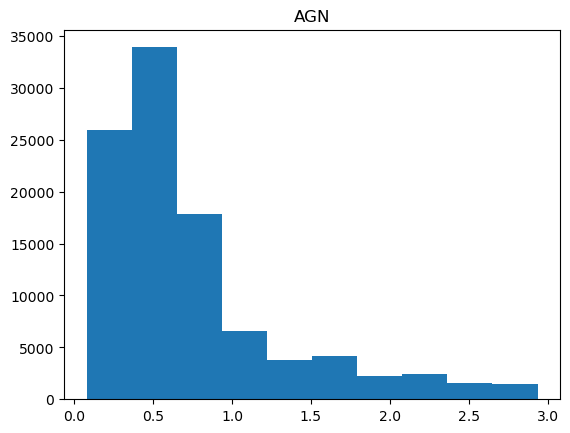

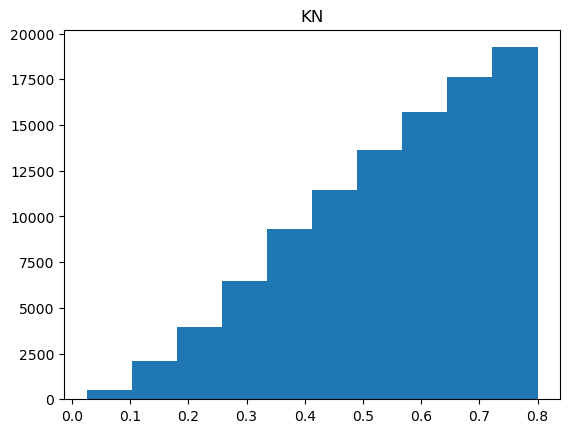

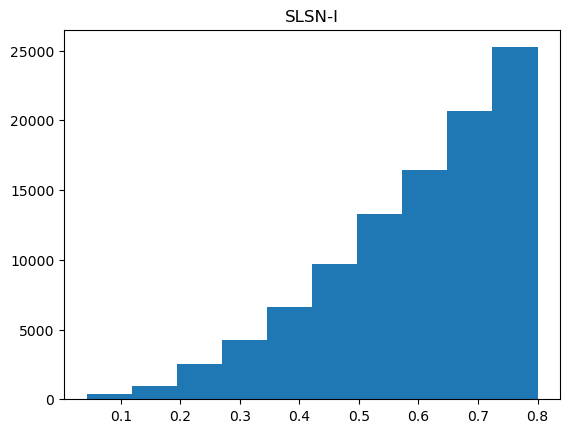

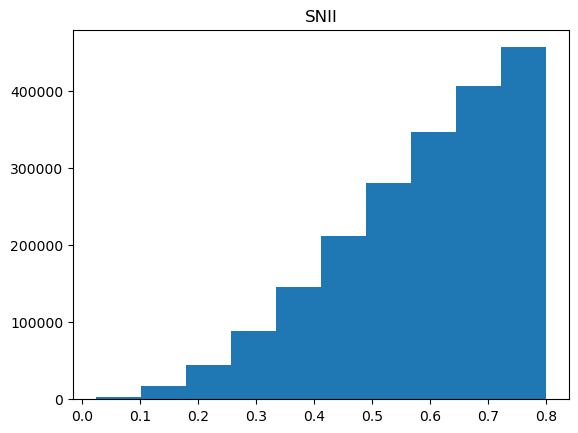

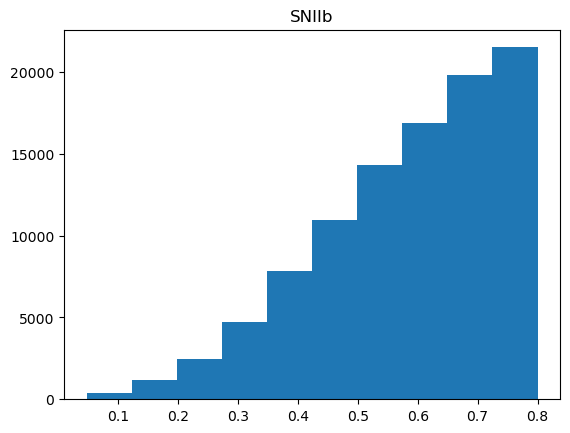

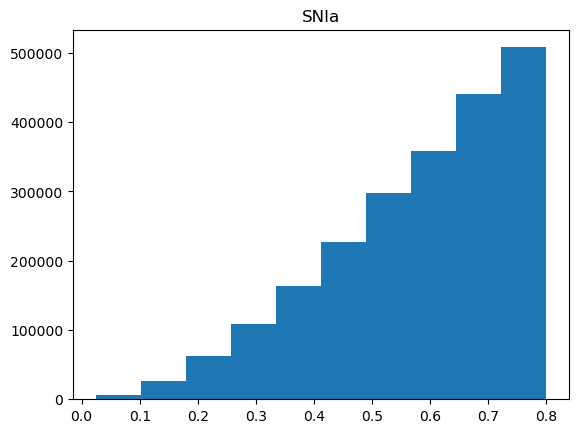

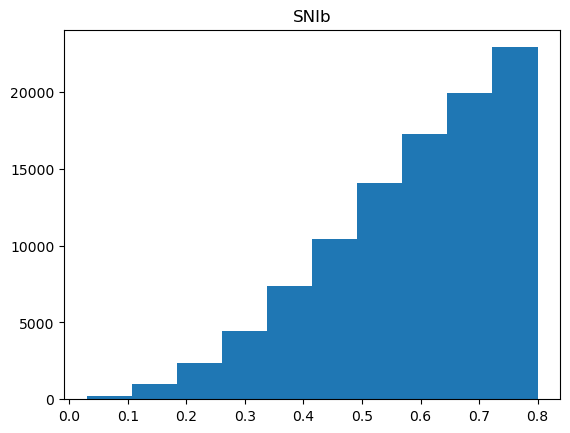

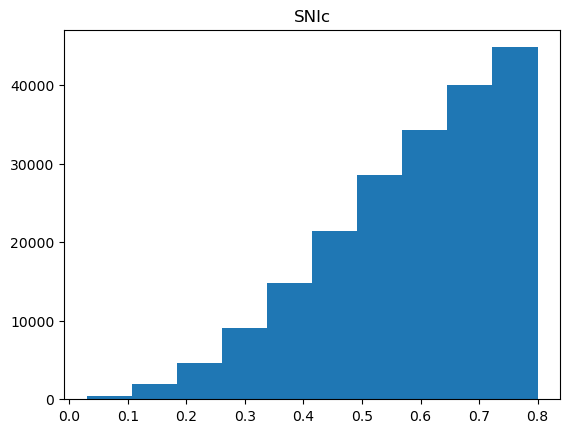

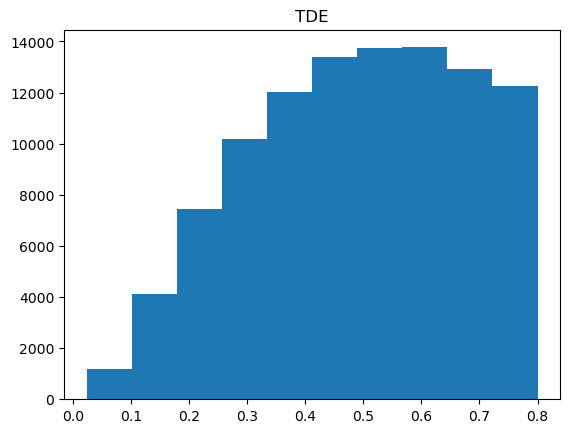

<Figure size 640x480 with 0 Axes>

In [62]:
for cl in htable.keys():    
    plt.hist(htable[cl]['z'][:])
    plt.title(cl)
    plt.show()
    plt.clf()

